<a href="https://colab.research.google.com/github/dayananikol/CCMACLRL_EXERCISES_COM221ML/blob/main/exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

In [456]:
df = pd.read_excel("personality.xlsx")

In [457]:
df.head()

,Name,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,John Efren Gannaban,0,1,1,1600,1
1,Jascent Pearl Navarro,1,1,0,762,0
2,Joyce Anne Colocado,0,0,0,300,0
3,Fortune Bermudez,0,1,1,400,1
4,Earl Anthony Gamboa,1,1,1,1200,1


In [458]:
df.drop(columns='Name', inplace=True)

In [459]:
df.head()

,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
0,0,1,1,1600,1
1,1,1,0,762,0
2,0,0,0,300,0
3,0,1,1,400,1
4,1,1,1,1200,1


1. Display the summary of all the features of the dataset using `.info()`

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Post/Share Frequently?       50 non-null     int64
 1   Active in social media?      50 non-null     int64
 2   Replies to comments?         50 non-null     int64
 3   Number of friends/followers  50 non-null     int64
 4   Personality                  50 non-null     int64
dtypes: int64(5)
memory usage: 2.1 KB


In [461]:
df.describe()

,Post/Share Frequently?,Active in social media?,Replies to comments?,Number of friends/followers,Personality
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.520000,0.900000,0.720000,1004.640000,0.500000
std,0.504672,0.303046,0.453557,798.730492,0.505076
min,0.000000,0.000000,0.000000,65.000000,0.000000
25%,0.000000,1.000000,0.000000,332.750000,0.000000
50%,1.000000,1.000000,1.000000,731.000000,0.500000
75%,1.000000,1.000000,1.000000,1475.000000,1.000000
max,1.000000,1.000000,1.000000,3400.000000,1.000000


2. Display the total number of samples from each label using `.value_counts()`

In [462]:
df['Personality'].value_counts()

,count
Personality,
1,25
0,25


## C. Split the dataset into training and test set

3. Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [463]:
X = df.drop(columns=['Personality']).values

4. Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [464]:
y = df['Personality'].values

5. Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [465]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40, 4)
(40,)
(10, 4)
(10,)


## D. Create the model

6. Use KNN as a classifier by using `KNeighborsClassifier()`

In [466]:
knn = KNeighborsClassifier(n_neighbors=23)

7. Train the model using the `.fit()`

In [467]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

8. Test the model using the `.predict()`

In [468]:
y_pred = knn.predict(X_test)

## Evaluate the model

9. Create a confusion matrix

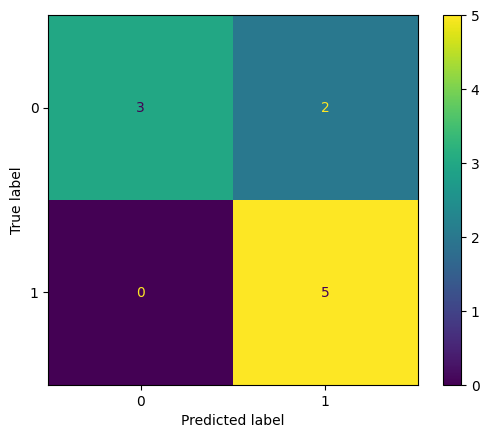

In [469]:
conf_matrix = confusion_matrix(y_pred, y_test, labels=knn.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

10. Display the accuracy

In [470]:
metrics.accuracy_score(y_test, y_pred)

0.8

11. Display the precision

In [471]:
precision = precision_score(y_test, y_pred, average=None)
print("Precision:", precision)

Precision: [0.6 1. ]


12. Display the recall

In [472]:
recall = recall_score(y_test, y_pred, average=None)
print("Recall:", recall)

Recall: [1.         0.71428571]


13. Display the f1-score

In [473]:
f1 = f1_score(y_test, y_pred, average=None)
print("f1-score:", f1)

f1-score: [0.75       0.83333333]


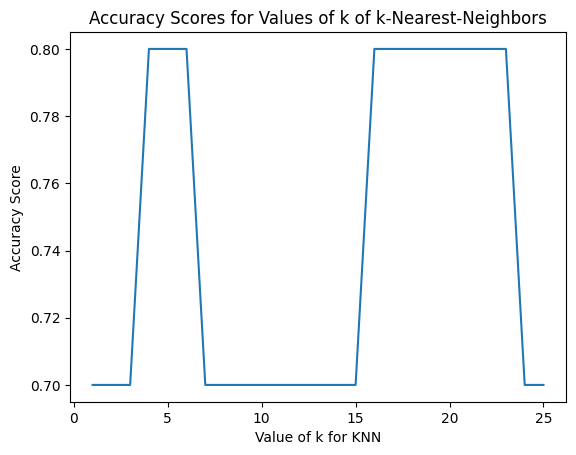

In [474]:
k_range = list(range(1,26))
scores = []

for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the model
    knn.fit(X_train, y_train)

    # Test the model
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [475]:
knn.predict([[0, 1, 1, 2100]])

array([1])